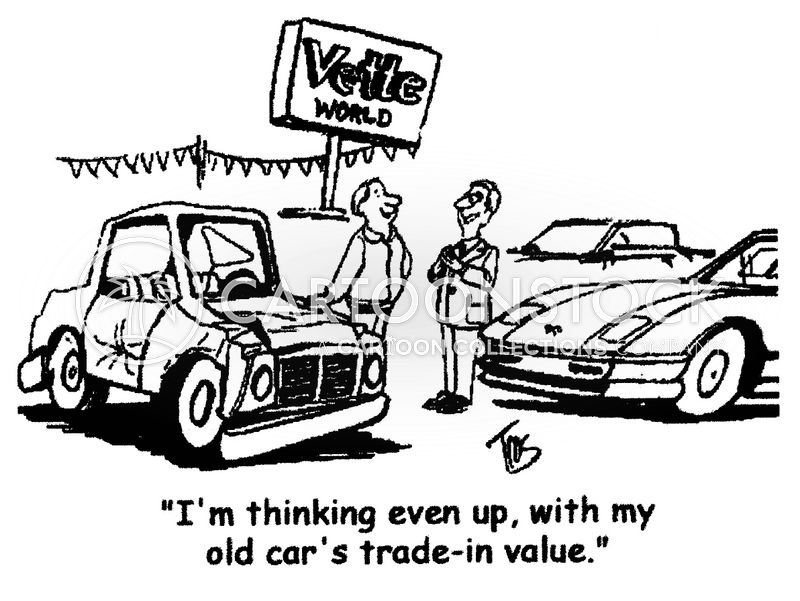

# CAR PRICE PREDICTION

##### Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

- Data Collection Phase:
    You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.more the data better the model. In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

- Model Building Phase
    After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Car_Price.csv")

In [3]:
df

,Unnamed: 0,Year,Model,Transmission,Fuel,KMS,Ownership,Price
0,0,2014,Mercedes Benz C Class,Automatic,Petrol,36806,1,2133299
1,1,2019,Hyundai Verna,Manual,Petrol,80631,1,981699
2,2,2009,Maruti Wagon R,Manual,Petrol,57473,1,156599
3,3,2009,Hyundai i10,Manual,Petrol,61520,1,177299
4,4,2020,KIA SELTOS,Automatic,Petrol,7568,1,1741799
...,...,...,...,...,...,...,...,...
4691,166,2015,Mahindra Scorpio,Manual,Diesel,53877,2,859999
4692,167,2016,Maruti Vitara Brezza,Manual,Diesel,95285,1,630999
4693,168,2013,Hyundai i20,Manual,Diesel,61199,2,306599
4694,169,2015,Ford Ecosport,Manual,Petrol,34276,1,512299


In [4]:
#DataSet Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4696 non-null   int64 
 1   Year          4696 non-null   int64 
 2   Model         4696 non-null   object
 3   Transmission  4623 non-null   object
 4   Fuel          4696 non-null   object
 5   KMS           4696 non-null   int64 
 6   Ownership     4696 non-null   int64 
 7   Price         4696 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 293.6+ KB


The data has 4695 rows and 8 columns where Model, Transmission and Fuel are objective datatype. Other columns are integer

In [5]:
#checking if any columns are null
null_columns=df.columns[df.isnull().any()]

In [6]:
print(df[df["Price"].isnull()][null_columns])

Empty DataFrame
Columns: [Transmission]
Index: []


Only Transmission column shows null data

In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

We dropped the Unnamed: 0 column as it has onlys erial numbers in recurring order and had no significant role to play in model building.

In [8]:
df.isnull().sum()

Year             0
Model            0
Transmission    73
Fuel             0
KMS              0
Ownership        0
Price            0
dtype: int64

Transmission column shows 73 null values.

<AxesSubplot:>

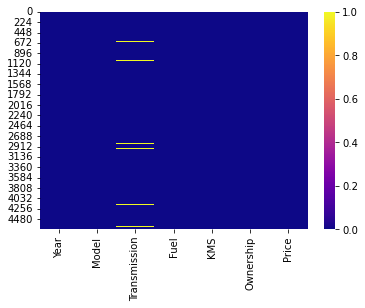

In [9]:
sns.heatmap(df.isnull(),cmap='plasma')

Heatmap confirms graphically the null values in Transmission column

## Imputation:

- Using Imputation method to fill the null data in the dataset. 
- Categorical/object null values in the columns are filled with mode, while mean is used to fill the numerical null values in the columns.

In [10]:
df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])

In [11]:
df.shape

(4696, 7)

The shape of the dataframe is now it has 4696 rows and 7 columns

In [12]:
df.columns

Index(['Year', 'Model', 'Transmission', 'Fuel', 'KMS', 'Ownership', 'Price'], dtype='object')

In [13]:
df.nunique()

Year              15
Model            133
Transmission       3
Fuel               4
KMS             3349
Ownership          3
Price           2758
dtype: int64

The unique function gives the unique number of values present in each column.

In [14]:
df.isna().sum()

Year            0
Model           0
Transmission    0
Fuel            0
KMS             0
Ownership       0
Price           0
dtype: int64

- After imputation, we can see that there is no null data present naymore in the dataset.

In [15]:
df.head(5) #gives the first 5 rows information in the dataframe

,Year,Model,Transmission,Fuel,KMS,Ownership,Price
0,2014,Mercedes Benz C Class,Automatic,Petrol,36806,1,2133299
1,2019,Hyundai Verna,Manual,Petrol,80631,1,981699
2,2009,Maruti Wagon R,Manual,Petrol,57473,1,156599
3,2009,Hyundai i10,Manual,Petrol,61520,1,177299
4,2020,KIA SELTOS,Automatic,Petrol,7568,1,1741799


In [16]:
# getting list of object data type columns:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

# getting the list of numeric data type columns:
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['Model', 'Transmission', 'Fuel']

Number Data Type Columns are:
 ['Year', 'KMS', 'Ownership', 'Price']


##### Listing the Object type columns with counts:

In [17]:
for i in object_datatype:
    print(i)
    print(df[i].value_counts())
    print("-----------------------------------------------------------------------------------------------------")

Model
Maruti Swift               340
Maruti Baleno              338
Hyundai Grai10             237
Ford Ecosport              229
Maruti Vitara Brezza       220
                          ... 
Volkswagen Jetta             1
Renault                      1
Maruti New Wagon R           1
Renault kwid                 1
Maruti Wagon R Stingray      1
Name: Model, Length: 133, dtype: int64
-----------------------------------------------------------------------------------------------------
Transmission
Manual       3939
Automatic     756
 Manual         1
Name: Transmission, dtype: int64
-----------------------------------------------------------------------------------------------------
Fuel
Petrol          3291
Diesel          1359
Petrol + CNG      45
Petrol + LPG       1
Name: Fuel, dtype: int64
-----------------------------------------------------------------------------------------------------


In [18]:
pd.set_option('display.max_rows', None) #displays the maximum rows in the dataset

In [70]:
df['Model'].value_counts()

Maruti Swift               340
Maruti Baleno              338
Hyundai Grai10             237
Ford Ecosport              229
Maruti Vitara Brezza       220
Maruti Wagon R 1.0         183
Hyundai Elite i20          165
Maruti Alto 800            156
Honda City                 136
Hyundai Creta              133
Maruti Alto K10            120
Renault Kwid               108
Maruti Alto                107
Maruti Dzire               103
Maruti S PRESSO             99
Maruti Celerio              93
Maruti Ciaz                 80
Honda Jazz                  76
Hyundai VENUE               74
Hyundai Verna               69
Honda Amaze                 66
Maruti Swift Dzire          65
Hyundai NEW SANTRO          63
Maruti S Cross              63
MG HECTOR                   58
Jeep Compass                53
Maruti Eeco                 52
Hyundai Eon                 51
Maruti IGNIS                46
Hyundai i10                 44
Hyundai i20                 43
Volkswagen Polo             42
Mahindra

In [20]:
#Replacing " Manual" as "Manual" in the Transmission Column:
df["Transmission"] = df["Transmission"].replace(" Manual","Manual")

In [21]:
df["Model"] = df["Model"].replace("Maruti Dzire","Maruti Swift Dzire")
df["Model"] = df["Model"].replace("Maruti Swift","Maruti Swift Dzire")
df["Model"] = df["Model"].replace("Hyundai NEW I20","Hyundai i20")
df["Model"] = df["Model"].replace("Maruti New Wagon R","Maruti Wagon R")
df["Model"] = df["Model"].replace("Maruti New Wagon-R","Maruti Wagon R")
df["Model"] = df["Model"].replace("Maruti Wagon R 1.0","Maruti Wagon R")
df["Model"] = df["Model"].replace("Maruti Wagon R Duo","Maruti Wagon R")
df["Model"] = df["Model"].replace("Maruti Wagon R Stingray","Maruti Wagon R")
df["Model"] = df["Model"].replace("Renault","Renault Kwid")
df["Model"] = df["Model"].replace("Renault kwid","Renault Kwid")
df["Model"] = df["Model"].replace("Tata TIAGO NRG","Tata Tiago")
df["Model"] = df["Model"].replace("Tata Altroz","Tata ALTROZ")
df["Model"] = df["Model"].replace("Ford Figo Aspire","Ford Figo")
df["Model"] = df["Model"].replace("Ford New Figo","Ford Figo")
df["Model"] = df["Model"].replace("KIA SELTOS","Kia Seltos")
df["Model"] = df["Model"].replace("Tata Nexon","Tata NEXON")

We replaced all the repetitive elements with one to avoid redundancy

## Data Visualization (EDA)

#### Univariate Analysis: We plot each columns seperately.

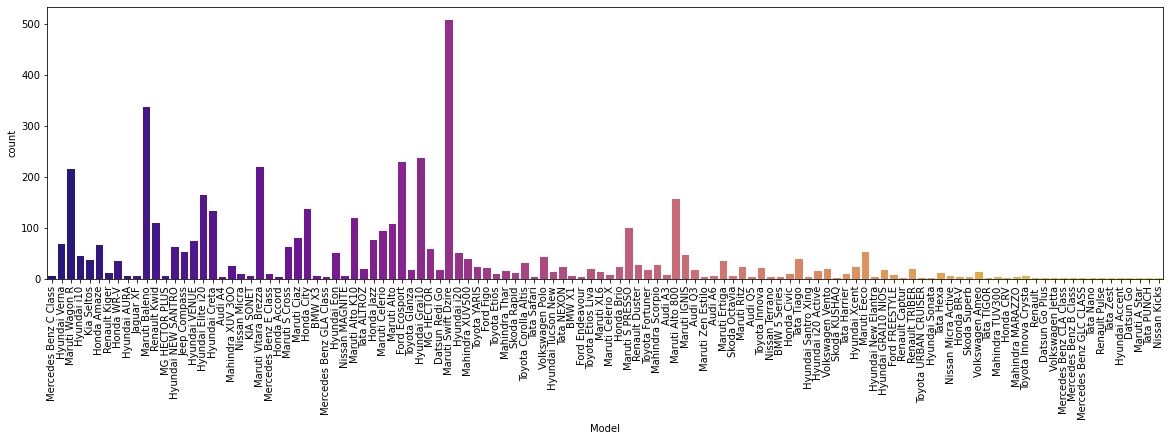

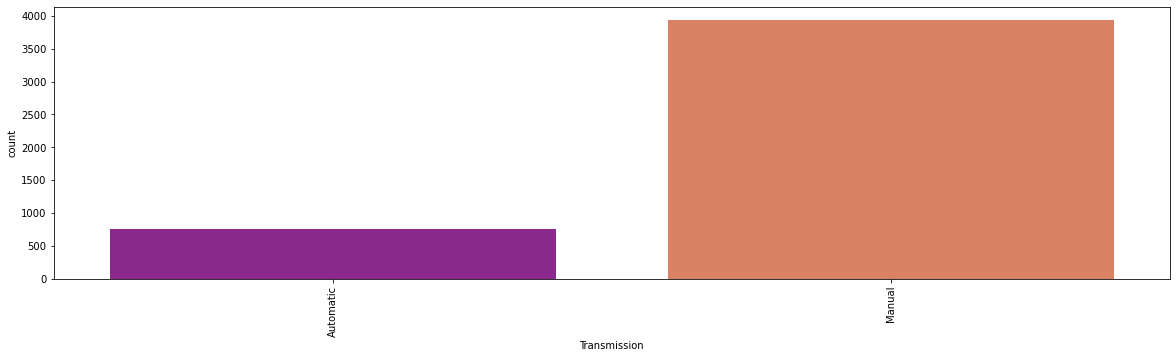

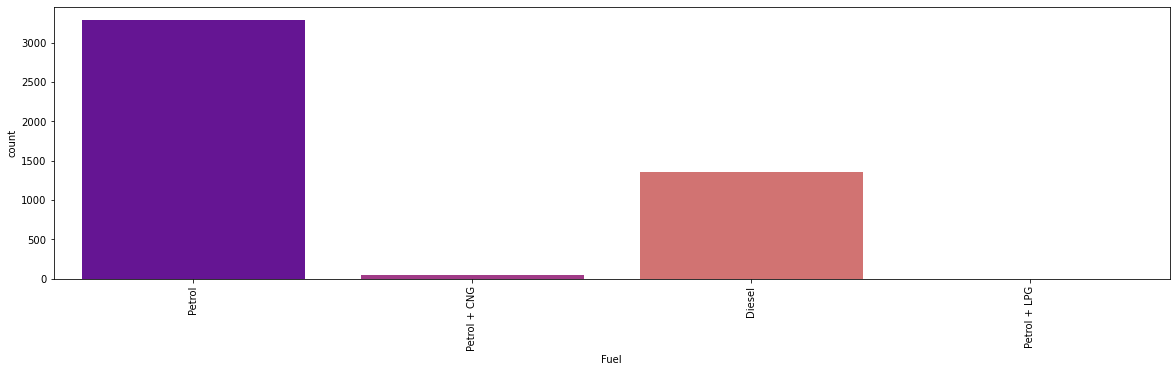

In [22]:
for i in object_datatype:
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.countplot(df[i],palette='plasma')

- Maruti swift dezire was the car which has the highest count in the used car category, followed by Maruti Baleno. The least count were for the luxury cars like Mercedes, Audi,Renault,Volkswagon etc
- Manual Transmission has more count compared to Automatic Transmission in te used car category.
- Petrol cars were most in count(above 300), while petrol+LPG were least or may be in the range of 1-2

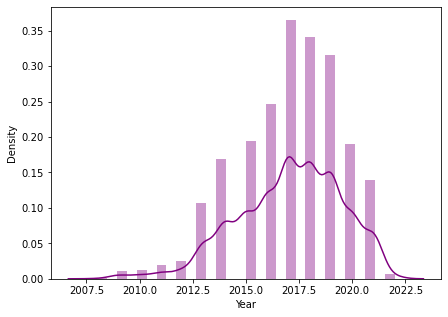

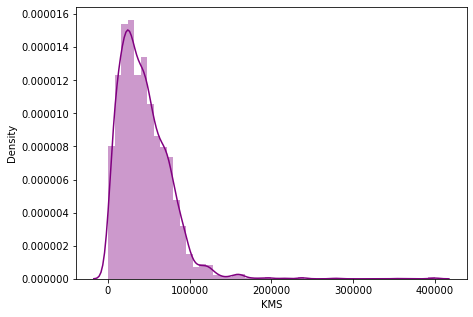

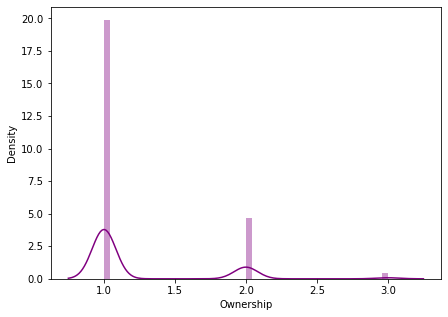

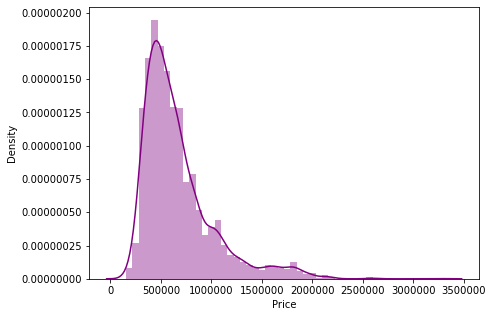

In [25]:
for i in number_datatype:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i], color='purple')
    plt.ticklabel_format(style='plain')
    plt.show()

- Maximum cars were from the mid year 2017-2019, while least were from the year mid 2008 and 2022.
- Mostcars covered the distance between 20000-80000kms. Least touched the range of 200000kms. The highest density was for the the kms 40000-50000
- 1st ownership cars were maximum in count, while 3rd ownership were the least.
- The maximum price was around 2200000, while the maximum cars were having the price between 400000-800000 INR

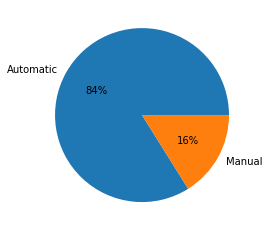

In [24]:
labels="Automatic","Manual"
fig, pc = plt.subplots()
pc.pie(df['Transmission'].value_counts(), labels=labels, autopct='%1.0f%%')
plt.show()

84% used cars were automatic, whereas 16% were manual.

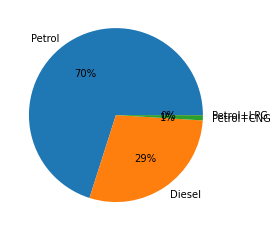

In [25]:
labels="Petrol","Diesel","Petrol+CNG","Petrol+LPG"
fig, pc = plt.subplots()
pc.pie(df['Fuel'].value_counts(), labels=labels, autopct='%1.0f%%')
plt.show()

Petrol cars were 70%, Diesel were 29%, 1% was Petrol+CNG, while almost 0 were Petrol LPG.

##### Bivariate Analysis
- Here both "Rainfall" and "RainTomorrow" columns are plotted with other columns:

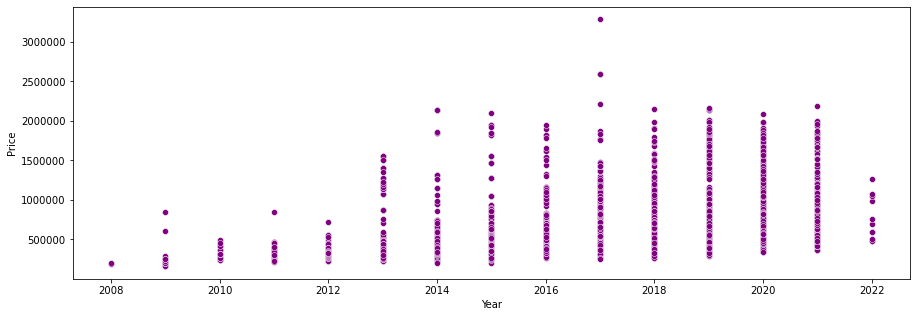

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'Year' ,y ='Price', color='purple', data = df)
plt.ticklabel_format(style='plain')
plt.show()

Maximum used cars were from 2019 whose price were above 3000000 INR, and those from the years 2014-2021 were in the range of 2000000-2500000 INR. Least priced were fromthe year 2008 whose price was less than 500000


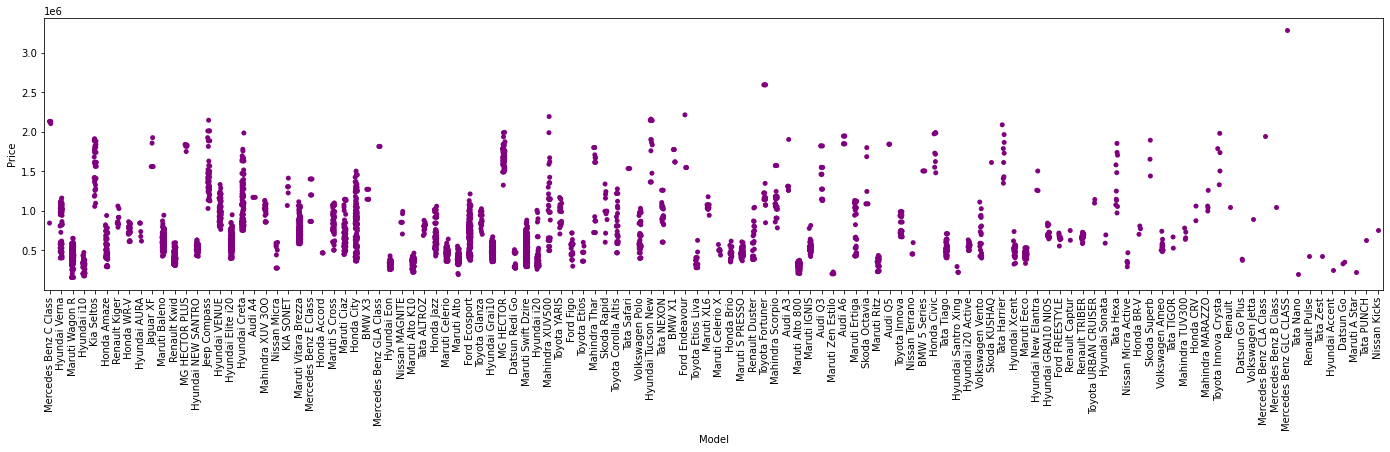

In [32]:
plt.figure(figsize=(24,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'Model' , y ='Price', color='purple', data = df)
plt.show()

Audi A3 and Mahindra scorpio in the used cars were having the highest price  of around 2600000 INR. Jeep Compass, MG Hector, Mahindra XUV500, toyota Fortuner were in the maximum price range between 2000000-2300000INR

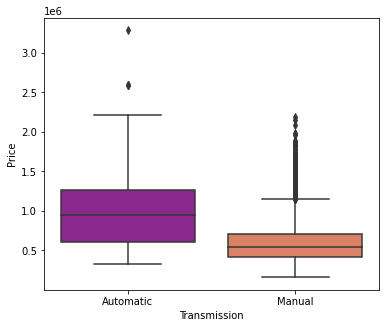

In [31]:
plt.figure(figsize=(6,5))
sns.boxplot(x = 'Transmission' , y ='Price',  data = df,palette='plasma')
plt.show()

The price of cars with automatic transmission was in the range of 600000-3000000INR and above. While price for manual transmission was from 500000-around 2500000INR.

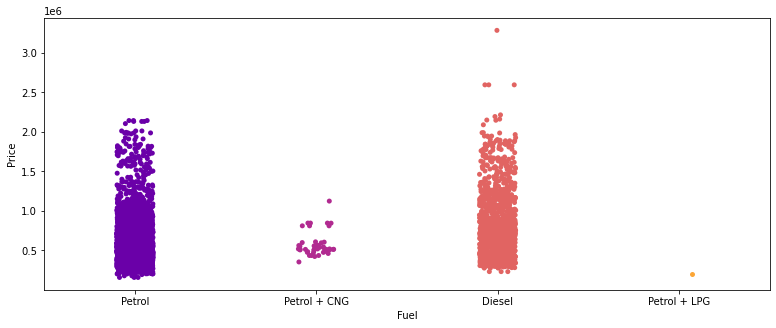

In [29]:
plt.figure(figsize=(13,5))
sns.stripplot(x = 'Fuel' , y ='Price', data = df,palette='plasma')
plt.show()

Cars with disel fuel were priced at about 3000000INR and above, but most density was between 400000-2000000INR. PEtrol+LPG were priced at less than 500000INR, while petrol cars were priced between 200000-2300000INR

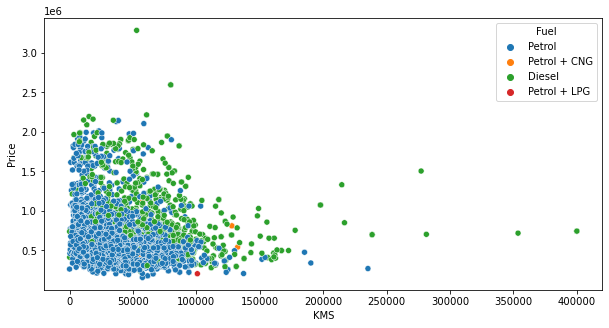

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'KMS', y ='Price',hue='Fuel', data = df)
plt.show()

- More the KMS, less was the price cost. Disel cars were priced lower and were the cars with maximum kms.
- Petrol+LPG cars were having 100000kms added to them and were in the price range of 200000-300000INR, while petrol+CNG has around 140000kms and had a price range between 500000-900000INR.
- Maximum cars had petrol as fuel and covered the distance of 0-100000kms, with the pricerange from 200000-2000000INR. 
- Diesel car with around 50000kms had the price of above 3000000INR.

<Figure size 360x360 with 0 Axes>

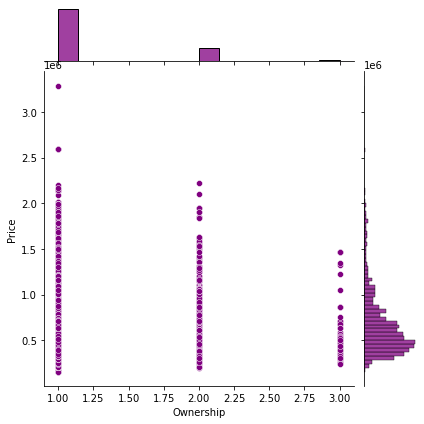

In [34]:
plt.figure(figsize=(5,5))
sns.jointplot(x = 'Ownership' , y ='Price', color='purple', data = df)
plt.show()

As the ownership of the cars increased the price of the cars decreased. 

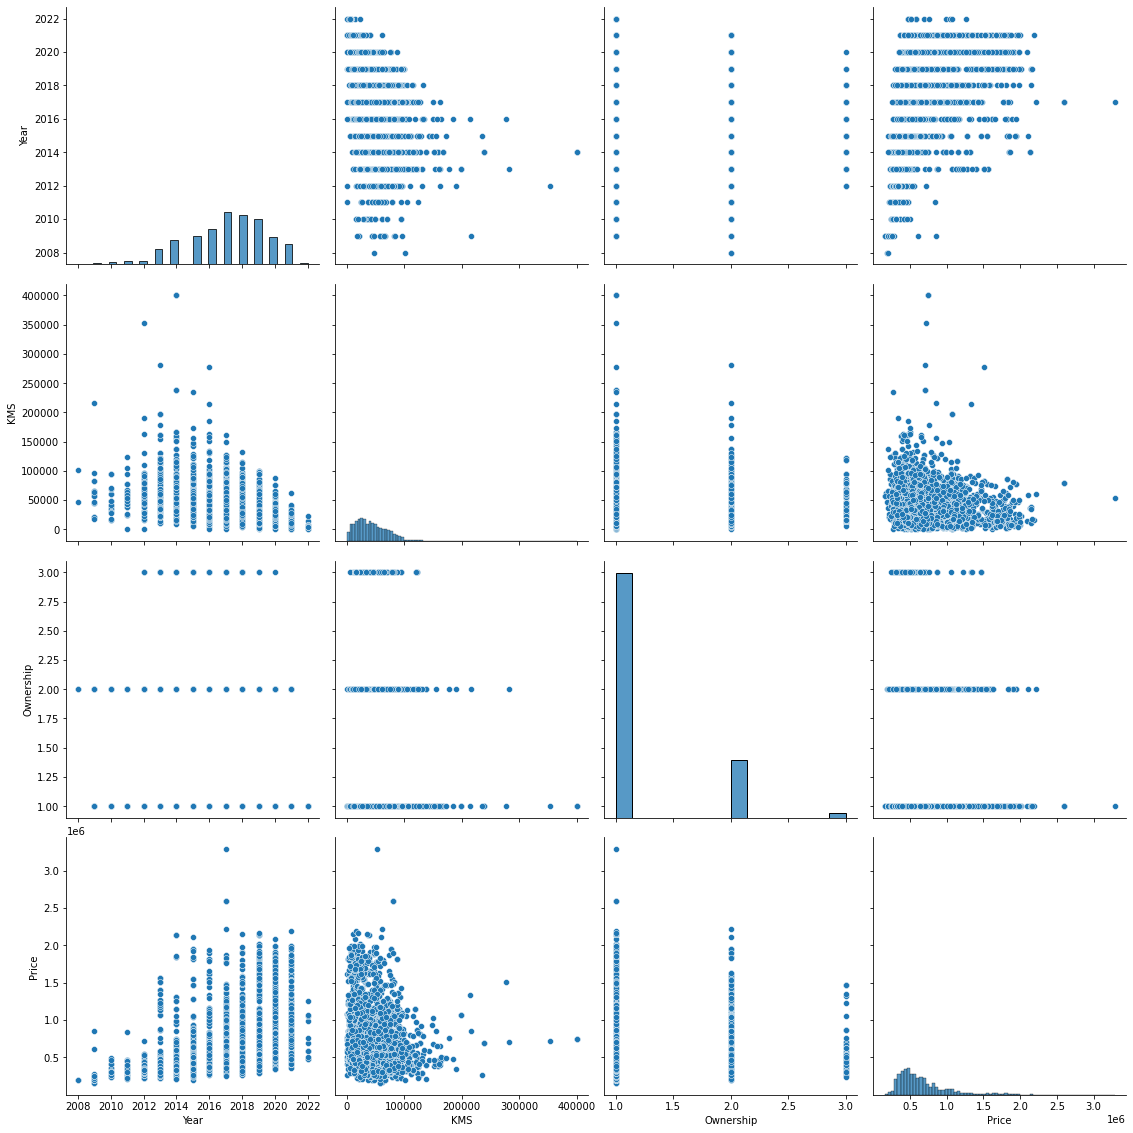

In [32]:
sns.pairplot(data=df,height=4)

These plots show relationships between the columns in the dataset with each other.

### Encoding the Dataset
Since few columns were in object type, we convert them in binary form by encoding them.

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['Model', 'Transmission', 'Fuel']
for val in l:
    df[val]=le.fit_transform(df[val].astype(str))

In [75]:
df.head(3)

,Year,Model,Transmission,Fuel,KMS,Ownership,Price
0,2014,74,0,1,36806,1,2133299
1,2019,37,1,1,80631,1,981699
2,2009,70,1,1,57473,1,156599


In [76]:
df.describe()

,Year,Model,Transmission,Fuel,KMS,Ownership,Price
count,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000,4.696000e+03
mean,2017.065801,52.985094,0.839012,0.720613,44336.172700,1.221678,6.681358e+05
std,2.433292,25.627233,0.367559,0.470978,31406.807094,0.454122,3.511442e+05
min,2008.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.565990e+05
25%,2015.000000,30.000000,1.000000,0.000000,21886.000000,1.000000,4.312990e+05
50%,2017.000000,58.000000,1.000000,1.000000,39299.500000,1.000000,5.695990e+05
75%,2019.000000,68.000000,1.000000,1.000000,61569.750000,1.000000,7.942490e+05
max,2022.000000,117.000000,1.000000,3.000000,400055.000000,3.000000,3.287199e+06


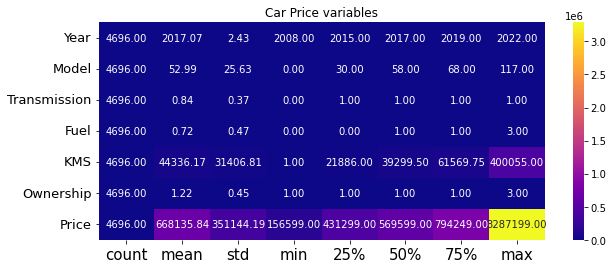

In [77]:
plt.figure(figsize=(10,4))
sns.heatmap(df.describe().transpose(),annot=True,fmt='0.2f',cmap='plasma')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Car Price variables")
plt.show()

In the above heatmap:
- The mean is greater than the median for the columns Price and KMS, this means that skewness is present.
- The standard deviation is high in the KMS column= data is spread
- The column KMS shows difference between 75 percentile and max, means outliers might be present.

### Check Correlation of columns with the target:

In [78]:
df.corr()

,Year,Model,Transmission,Fuel,KMS,Ownership,Price
Year,1.000000,0.048422,-0.110322,0.232378,-0.504950,-0.167404,0.376699
Model,0.048422,1.000000,0.029548,0.001384,0.058672,-0.049002,-0.114193
Transmission,-0.110322,0.029548,1.000000,-0.047020,0.046302,-0.033702,-0.426322
Fuel,0.232378,0.001384,-0.047020,1.000000,-0.397982,0.019759,-0.237186
KMS,-0.504950,0.058672,0.046302,-0.397982,1.000000,0.056048,-0.119456
Ownership,-0.167404,-0.049002,-0.033702,0.019759,0.056048,1.000000,-0.077932
Price,0.376699,-0.114193,-0.426322,-0.237186,-0.119456,-0.077932,1.000000


<AxesSubplot:>

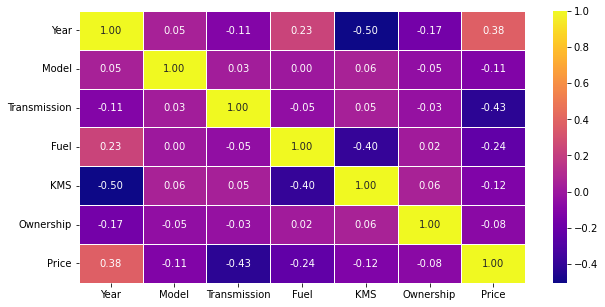

In [79]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='plasma',annot=True,linewidth=0.5,fmt='0.2f')

Our Target column is the Price:

- Max Positive correlation with the target is seen with the column Year.
- Least negative correlation is with the columns Ownership, followed by Model and KMS.
- MAximum negative relation with target is with the column Transmission and Fuel

In [80]:
df.corr()['Price'].sort_values(ascending=False)

Price           1.000000
Year            0.376699
Ownership      -0.077932
Model          -0.114193
KMS            -0.119456
Fuel           -0.237186
Transmission   -0.426322
Name: Price, dtype: float64

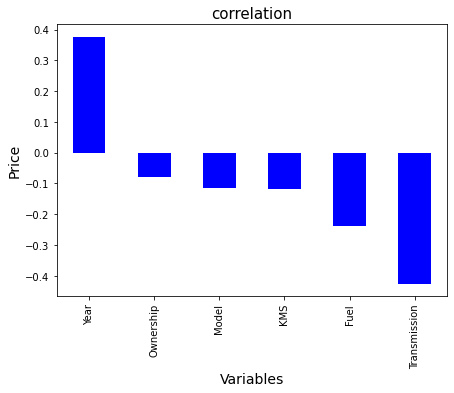

In [81]:
plt.figure(figsize=(7,5))
df.corr()["Price"].sort_values(ascending=False).drop(['Price']).plot(kind='bar', color='blue')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

## Checking Outliers

In categorical columns, we wont be considering the outliers, and outliers in the numerical columns will only be considered.

Year                AxesSubplot(0.125,0.71587;0.352273x0.16413)
Model            AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Transmission       AxesSubplot(0.125,0.518913;0.352273x0.16413)
Fuel            AxesSubplot(0.547727,0.518913;0.352273x0.16413)
KMS                AxesSubplot(0.125,0.321957;0.352273x0.16413)
Ownership       AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Price                 AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

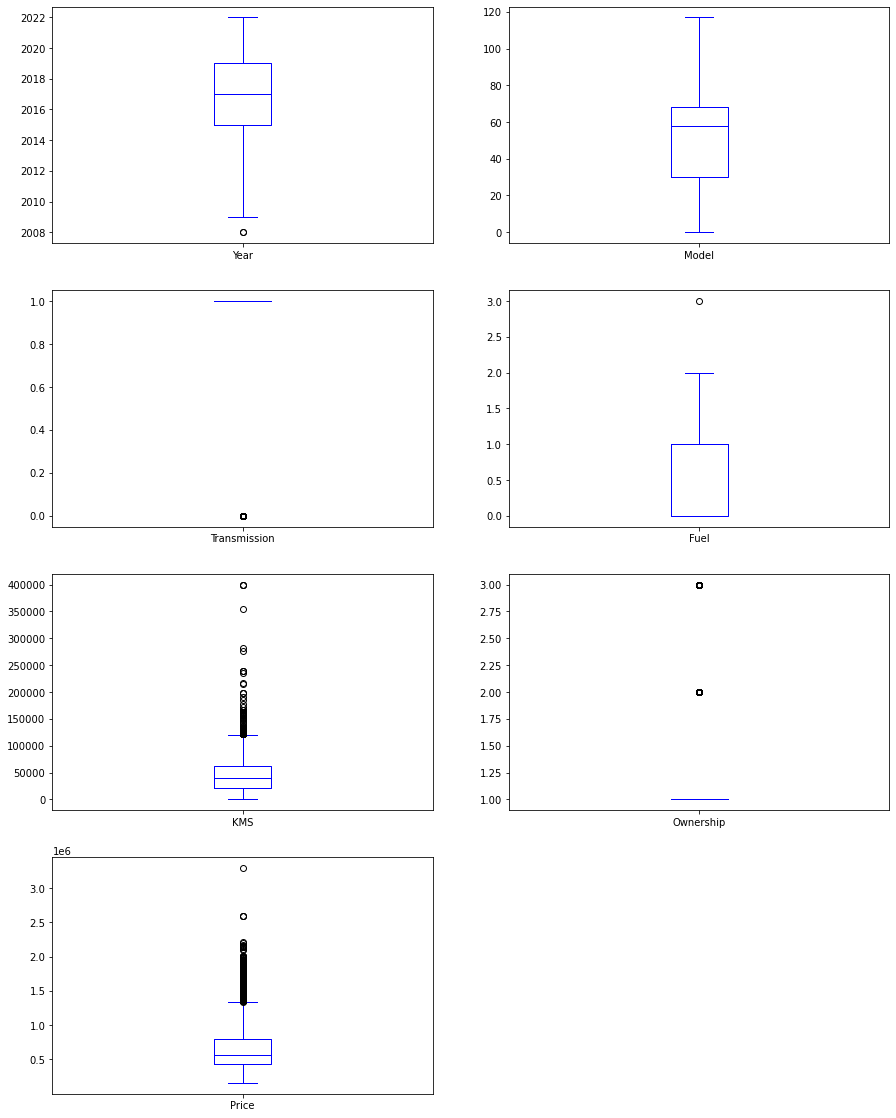

In [83]:
df.plot(kind='box',subplots=True, layout=(4,2),figsize=(15,20), color='blue')

Outliers can be seen in the Year, Ownership, KMS columns and Price column. But since the Price column is the target we dont alter that column.

### Removing The Outliers with Zscore method.

In [84]:
from scipy.stats import zscore
a=df[["Year","KMS", "Ownership"]]
z=np.abs(zscore(a))
z.head()

,Year,KMS,Ownership
0,1.260074,0.239788,0.488199
1,0.794975,1.155759,0.488199
2,3.315122,0.418324,0.488199
3,3.315122,0.547195,0.488199
4,1.205984,1.170832,0.488199


In [85]:
threshold=3
(np.where(z>3))

DF=df[(z<3).all(axis=1)]

we have taken 3 as the threshold value, because anything beyond the z score value of 3 is an outlier.

In [86]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (4696, 7)
New_DF: (4545, 7)
total dropped rows: 151


### Percentage data loss

In [87]:
loss_percent=(4696-4545)/4696*100
print(loss_percent,'%')

3.215502555366269 %


3% data loss is considerable and acceptable

## Check Skewness
+/-5 is the threshold we are considering for skewness removal from numerical columns.

In [88]:
x=DF.drop('Price',axis=1)
y=DF['Price']

In [89]:
x.shape,y.shape

((4545, 6), (4545,))

In [90]:
x.skew()

Year           -0.419531
Model           0.204914
Transmission   -1.853679
Fuel           -0.711130
KMS             0.686183
Ownership       1.565625
dtype: float64

In [91]:
from sklearn.preprocessing import power_transform
X=power_transform(x,method='yeo-johnson')
X

array([[-1.34041614,  0.838351  , -2.28978861,  0.5433813 , -0.03725588,
        -0.48724543],
       [ 0.7772999 , -0.56581134,  0.43672154,  0.5433813 ,  1.31016435,
        -0.48724543],
       [ 1.23055499, -0.23983834, -2.28978861,  0.5433813 , -1.61250099,
        -0.48724543],
       ...,
       [-1.73575318, -0.441669  ,  0.43672154, -1.48062724,  0.77814247,
         2.05235376],
       [-0.93595609, -1.79643198,  0.43672154,  0.5433813 , -0.13650494,
        -0.48724543],
       [ 0.7772999 , -1.91163424,  0.43672154,  0.5433813 , -0.47500305,
        -0.48724543]])

In [92]:
x=pd.DataFrame(X, columns=x.columns)
x.head(2)

,Year,Model,Transmission,Fuel,KMS,Ownership
0,-1.340416,0.838351,-2.289789,0.543381,-0.037256,-0.487245
1,0.777300,-0.565811,0.436722,0.543381,1.310164,-0.487245


In [93]:
x.skew()

Year           -0.293389
Model          -0.107466
Transmission   -1.853679
Fuel           -0.138223
KMS            -0.081232
Ownership       1.565625
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

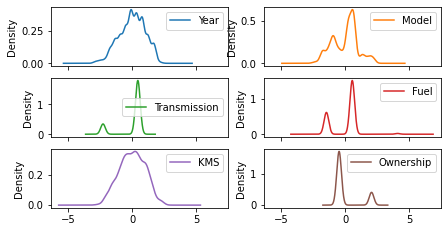

In [177]:
x.plot(kind='kde',subplots=True,layout=(4,2),figsize=(7,5))

Skewness is not present anymore as seen from the above graphs.

## Scaling The Data using Standard Scaler

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x=x1
x

array([[-1.34041614,  0.838351  , -2.28978861,  0.5433813 , -0.03725588,
        -0.48724543],
       [ 0.7772999 , -0.56581134,  0.43672154,  0.5433813 ,  1.31016435,
        -0.48724543],
       [ 1.23055499, -0.23983834, -2.28978861,  0.5433813 , -1.61250099,
        -0.48724543],
       ...,
       [-1.73575318, -0.441669  ,  0.43672154, -1.48062724,  0.77814247,
         2.05235376],
       [-0.93595609, -1.79643198,  0.43672154,  0.5433813 , -0.13650494,
        -0.48724543],
       [ 0.7772999 , -1.91163424,  0.43672154,  0.5433813 , -0.47500305,
        -0.48724543]])

# Training of the data

### Finding the best random fit
#### Since the data is continous we will use the linear regression model

In [97]:
ln=LinearRegression()
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    ln = LinearRegression()
    ln.fit(x_train,y_train)
    pred = ln.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.4569006719582992 at random state  34


Moving on with the train test split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=34)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((3636, 6), (909, 6), (3636,), (909,))

### Ridge Regression

In [99]:
from sklearn.linear_model import Ridge
r=Ridge() 
r.fit(x_train,y_train)
pred_test=r.predict(x_test)
pred_train=r.predict(x_train)
print('R2 Score=',r2_score(y_test,pred_test)*100)

R2 Score= 45.68911560666729


### Lasso Regression

In [100]:
l=Lasso() 
l.fit(x_train,y_train)
pred_test=l.predict(x_test)
pred_train=l.predict(x_train)
print('lasso R2 Score=',r2_score(y_test,pred_test)*100)

lasso R2 Score= 45.69003010052661


### ElasticNet Regression

In [101]:
en=ElasticNet() 
en.fit(x_train,y_train)
pred_test=en.predict(x_test)
pred_train=en.predict(x_train)
print('en R2 Score=',r2_score(y_test,pred_test)*100)

en R2 Score= 39.04980997619136


### Random Forest Regression

In [102]:
rf=RandomForestRegressor() 
rf.fit(x_train,y_train)
pred_testrf=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('R2 Score=',r2_score(y_test,pred_testrf)*100)

R2 Score= 92.55829969872183


### Support vector Regression

In [103]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 Score=',r2_score(y_test,pred_test)*100)

R2 Score= -5.6834005656252184


### KNeighbors Regression

In [104]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred_test=kn.predict(x_test)
pred_train=kn.predict(x_train)
print('kn R2 Score=',r2_score(y_test,pred_test)*100)

kn R2 Score= 68.33326901190384


### GradientBoostingRegression

In [105]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('gb R2 Score=',r2_score(y_test,pred_test)*100)

gb R2 Score= 85.39042974829283


### AdaBoostRegression

In [106]:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
pred_test=ab.predict(x_test)
pred_train=ab.predict(x_train)
print('ab R2 Score=',r2_score(y_test,pred_test)*100)

ab R2 Score= 34.401612029481356


### ExtraTreesRegression

In [107]:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
pred_train=et.predict(x_train)
print('et R2 Score=',r2_score(y_test,pred_test)*100)

et R2 Score= 91.49508326526858


### Stochastic Gradient Descent Regression

In [108]:
sgd=SGDRegressor() 
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
pred_train=sgd.predict(x_train)
print('sgd R2 Score=',r2_score(y_test,pred_test)*100)

sgd R2 Score= 45.63987986274422


#### R2 Score for Random Forest Regression is 92.55%

## Cross Validation Method

In [109]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print("Cross validadtion score of Linear regression Model is", scr.mean())

scr=cross_val_score(r,x,y,cv=5)
print("Cross validadtion score of Ridge Regression Model is", scr.mean())

scr=cross_val_score(l,x,y,cv=5)
print("Cross validadtion score of Lasso regression Model is", scr.mean())

scr=cross_val_score(en,x,y,cv=5)
print("Cross validadtion score of Elastic Net regression Model is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest Regression is", scr.mean())

scr=cross_val_score(svr,x,y,cv=5)
print("Cross validadtion score of Support Vector Regression is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighbors Regression is", scr.mean())

scr=cross_val_score(gb,x,y,cv=5)
print("Cross validadtion score of GradientBoosting Regression is", scr.mean())

scr=cross_val_score(ab,x,y,cv=5)
print("Cross validadtion score of AdaBossting Regression is", scr.mean())

scr=cross_val_score(et,x,y,cv=5)
print("Cross validadtion score of ExtraTrees Regression is", scr.mean())

scr=cross_val_score(sgd,x,y,cv=5)
print("Cross validadtion score of SGD Regression is", scr.mean())

Cross validadtion score of Linear regression Model is 0.3837426195244456
Cross validadtion score of Ridge Regression Model is 0.3837500155634418
Cross validadtion score of Lasso regression Model is 0.3837425954632862
Cross validadtion score of Elastic Net regression Model is 0.3359329777753399
Cross validadtion score of Random Forest Regression is 0.8889445736296026
Cross validadtion score of Support Vector Regression is -0.09613558799244779
Cross validadtion score of KNeighbors Regression is 0.6397292549064459
Cross validadtion score of GradientBoosting Regression is 0.8224143736763059
Cross validadtion score of AdaBossting Regression is 0.2883215523927481
Cross validadtion score of ExtraTrees Regression is 0.8626183042038551
Cross validadtion score of SGD Regression is 0.3796509106392185


#### Cross validation score of Gradient Boosting Regression is 82.24%, while the R2 score is 85.39%. This is the best R2 score after considering the difference between R2 and CV score for all the tried algorithms.

## Hyper parameter tuning of best model above (Gradient boosting regressor)

In [118]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach for Gradient boosting
para={'criterion': ['squared_error', 'friedman_mse','mse'],'n_estimators':[100,200,300,400],
      'max_features': ['auto','sqrt','log2'],
      'max_depth': [8,9,10,11]}

In [119]:
GCV=GridSearchCV(GradientBoostingRegressor(),para,cv=5)
GCV.fit(x_train,y_train) #fiting the data in the model
GCV.best_params_         #printing the best parameter found by GCV

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [121]:
GB=GradientBoostingRegressor(criterion='friedman_mse', max_depth=8 ,max_features= 'auto',n_estimators= 200)
GB.fit(x_train,y_train)
predgb=GB.predict(x_test)
print('R2_score:',r2_score(y_test,predgb)*100)
print("Best R2 Score for GCV best estimator", GB, "is",r2_score(y_test,predgb)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,predgb))
print('Mean squared error:',mean_squared_error(y_test,predgb))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predgb)))

R2_score: 92.38906207157314
Best R2 Score for GCV best estimator GradientBoostingRegressor(max_depth=8, max_features='auto', n_estimators=200) is 92.38906207157314
Error:
Mean absolute error: 48948.58454631972
Mean squared error: 9133118147.631517
Root mean squared error: 95567.34875275927


### Finding the best fit line

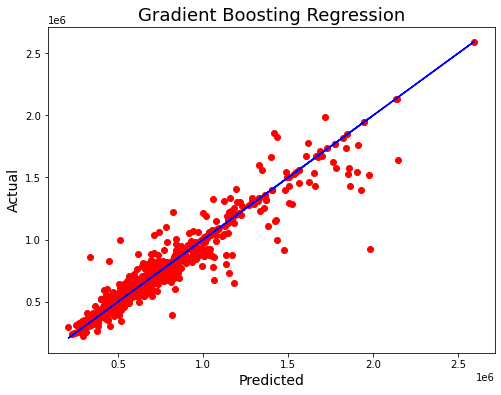

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predgb, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

## Saving the model

In [123]:
#saving the model 
import joblib
joblib.dump(GB,'CarPrice.pkl')

['CarPrice.pkl']

In [124]:
loadmodel = joblib.load('CarPrice.pkl')

In [125]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,720799,7.095499e+05
1,767299,7.631526e+05
2,1365699,1.362516e+06
3,1673799,1.677164e+06
4,410999,3.915356e+05
5,569499,5.865241e+05
6,659499,5.897763e+05
7,391599,4.100028e+05
8,593599,5.742360e+05
9,371099,3.865694e+05


## Conclusion:

#### - Best R2 Score for GCV best estimator GradientBoostingRegressor(max_depth=8, max_features='auto', n_estimators=200) is 92.38%
#### - This means the regression model works with 92% accuracy to predict the car prices of used cars.

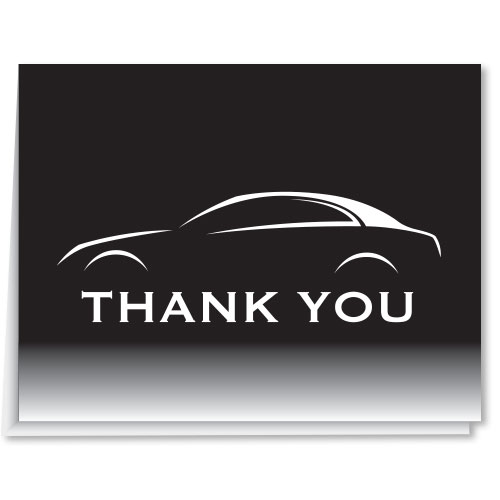